In [293]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn import datasets
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris()
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"


# Lendo os dados

In [294]:
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [295]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [296]:
df.species = df.species.map({'setosa':0, 'virginica':1, 'versicolor':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# Analisando os dados do DataSet Iris

In [297]:
df['species'].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='species'>

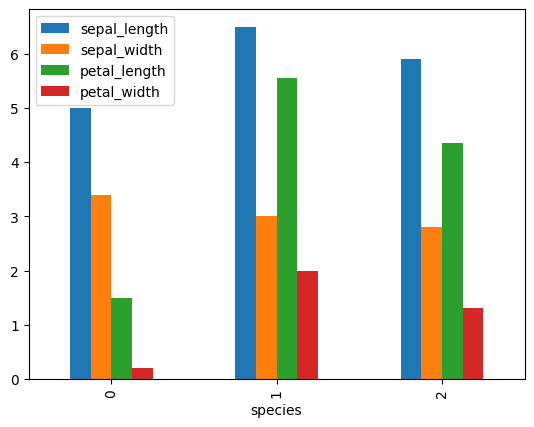

In [298]:
df.groupby('species').median().plot(kind='bar')

In [299]:
headers_list = df.columns.values.tolist()

In [300]:
cm = np.corrcoef(df[headers_list].values.T)

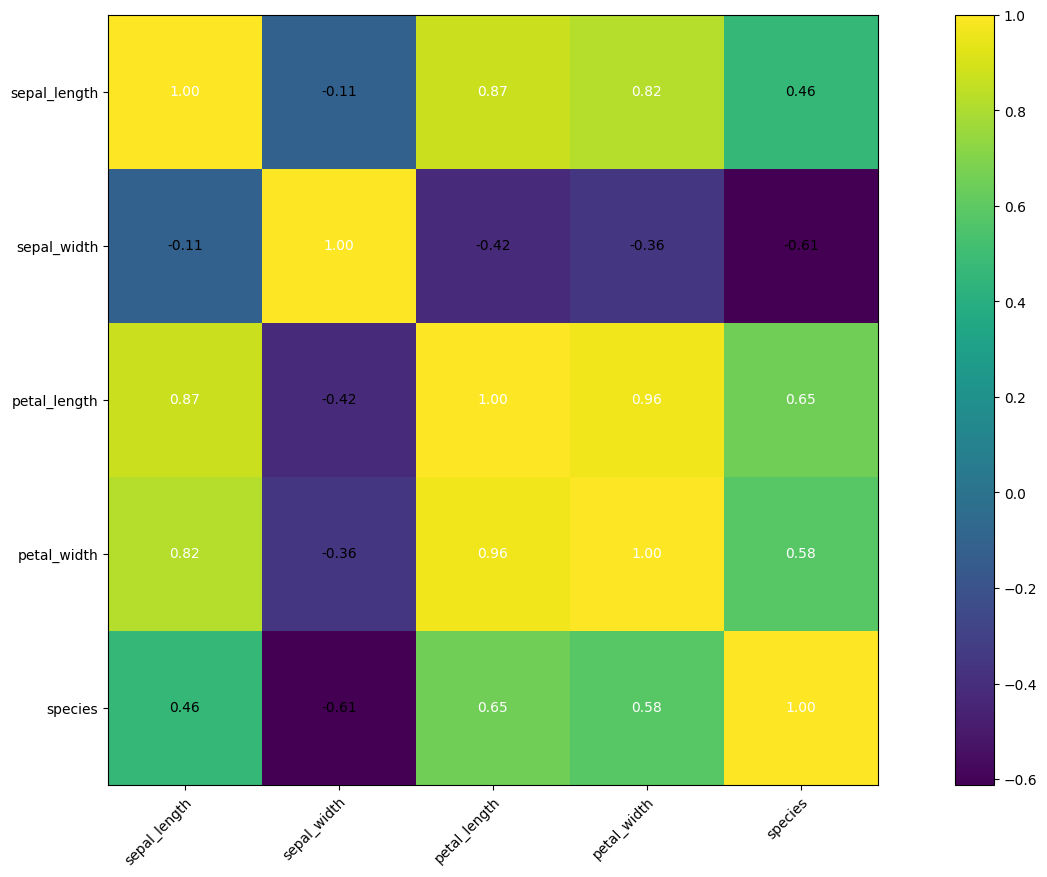

In [301]:
# Checando a coorelação entre as variáveis

hm = heatmap(cm, row_names= headers_list,column_names= headers_list, figsize=[20,10])
plt.show()


### Conclusão
O DataSet oferece uma distribução de flores, suas caracteristicas físicas e sua respectiva especies. Com isso irei utilizar as caracteristicas mais relevantes de cada flor para determinar qual especie ela é. Todas a caracteristas são úteis para poder fazer o modelo, exceto a 'Sepal Width', essa é a única caracteristica que não será relevante para a criação do modelo

## Separando X e y

In [302]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [303]:
data = df.to_numpy()
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [304]:
data.shape

(150, 5)

In [305]:
X = data[:,:-1]

y = data[:, -1]


In [306]:
print(X)
X.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

(150, 4)

In [307]:
print(y)
y.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


(150,)

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [309]:
X_train.shape

(112, 4)

In [310]:
X_test.shape

(38, 4)

# Tratamento de Dados

#### Converter cada array de Numpy em Tensores

In [311]:
X_test_T = torch.tensor(X_test)
X_train_T = torch.tensor(X_train)
y_test_T = torch.tensor(y_test)
y_train_T = torch.tensor(y_train)



In [312]:

class Iris_Dataset(Dataset):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]
    
    
# 

## Data Loader

In [313]:
train_dl = DataLoader(Iris_Dataset(X_train_T, y_train_T),  batch_size = len(X_train_T) )
test_dl  = DataLoader(Iris_Dataset(X_test_T, y_test_T),  batch_size = len(X_test_T) )
                             
   

# Criando o Modelo MLP

In [314]:
# Criar uma classe que herda o modulo nn.Module
class MLP_Model(nn.Module):
    
    def __init__(self):
        super(MLP_Model,self).__init__()
        
        # nn.Linear(a,b) --> a entrada, b mapeia ?
        # O primeiro neurônio tem 4 no parênteses pois o data set tem 4 caracteristicas no X,  
        
        self.L1 =  nn.Linear(4,32)
        
        
        
        self.A1 =  nn.Sigmoid()
        
        # No segundo, receberá o tanto que saiu na layer passada, logo:
        # nn.Linear(c,d) --> c == a, d == quantidasde que sera y previsto, ex: probabilidade de ser cada uma das flores
        
        self.L2 =  nn.Linear(32,16)
        
        self.L3 =  nn.Linear(16,8)
        
        self.L4 =  nn.Linear(8,3) 
        
        # SoftMax é uma função para classificação, ela é similar à função sigmoid
        
        self.A2 = nn.Softmax()
        
    def forward(self, x):
        
        
        
        x = self.L1(x)
        
        
        # Aqui estou transformando o vetor inicial de 4 em um vetor de 5
        
        x = self.A1(x)
       
        
        # Escalando o vetor via função sigmoid, outra possivel é a função reLU --> ler mais sobre
        
        x = self.L2(x)
        
        
        x = self.A1(x)
        
        x = self.L3(x)
        
        x = self.A1(x)
        
        x = self.L4(x)
        
        # Aqui estou transformando o vetor modificado de tamanho 5 em um vetor de 3
        
        x = self.A2(x)
        
        
        
        return x       

In [315]:
L1_value_before_train = torch.histogram(MLP_Model().L1.weight.detach())

X_L1_before = L1_value_before_train[1][0:100]
y_L1_before = L1_value_before_train[0]




In [316]:
L2_value_before_train = torch.histogram(MLP_Model().L1.weight.detach())

X_L2_before = L2_value_before_train[1][0:100]
y_L2_before = L2_value_before_train[0]


# Treino


--> Rascunho


In [317]:

def training( N_Epochs, model, loss_fn, opt  ):
    
    loss_list = []
    
    for epoch in range(N_Epochs+1):
        for xb, yb in train_dl:
            
            
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
            
            print(model.L1)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        
            print(epoch, "loss=", loss.item())
            loss_list.append(loss.item())
            
    
    plt.figure(figsize = (14,6))
    plt.title("cost decay")
    plt.plot(loss_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
            




Linear(in_features=4, out_features=32, bias=True)
0 loss= 1.102295160293579
Linear(in_features=4, out_features=32, bias=True)
1 loss= 1.1012481451034546
Linear(in_features=4, out_features=32, bias=True)
2 loss= 1.1002923250198364
Linear(in_features=4, out_features=32, bias=True)
3 loss= 1.0994266271591187
Linear(in_features=4, out_features=32, bias=True)
4 loss= 1.0986487865447998
Linear(in_features=4, out_features=32, bias=True)
5 loss= 1.0979551076889038
Linear(in_features=4, out_features=32, bias=True)
6 loss= 1.0973409414291382
Linear(in_features=4, out_features=32, bias=True)
7 loss= 1.0968011617660522
Linear(in_features=4, out_features=32, bias=True)
8 loss= 1.096329927444458
Linear(in_features=4, out_features=32, bias=True)
9 loss= 1.095921516418457
Linear(in_features=4, out_features=32, bias=True)
10 loss= 1.0955692529678345
Linear(in_features=4, out_features=32, bias=True)
11 loss= 1.095266580581665
Linear(in_features=4, out_features=32, bias=True)
12 loss= 1.0950067043304443


c:\Users\erick\OneDrive\Desktop\Estudos\Python\Pesquisa\.conda\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Linear(in_features=4, out_features=32, bias=True)
46 loss= 1.079210638999939
Linear(in_features=4, out_features=32, bias=True)
47 loss= 1.0776220560073853
Linear(in_features=4, out_features=32, bias=True)
48 loss= 1.0758717060089111
Linear(in_features=4, out_features=32, bias=True)
49 loss= 1.0739444494247437
Linear(in_features=4, out_features=32, bias=True)
50 loss= 1.0718257427215576
Linear(in_features=4, out_features=32, bias=True)
51 loss= 1.0695000886917114
Linear(in_features=4, out_features=32, bias=True)
52 loss= 1.0669523477554321
Linear(in_features=4, out_features=32, bias=True)
53 loss= 1.0641677379608154
Linear(in_features=4, out_features=32, bias=True)
54 loss= 1.061132788658142
Linear(in_features=4, out_features=32, bias=True)
55 loss= 1.0578354597091675
Linear(in_features=4, out_features=32, bias=True)
56 loss= 1.0542653799057007
Linear(in_features=4, out_features=32, bias=True)
57 loss= 1.050414800643921
Linear(in_features=4, out_features=32, bias=True)
58 loss= 1.046278

Linear(in_features=4, out_features=32, bias=True)
97 loss= 0.866971492767334
Linear(in_features=4, out_features=32, bias=True)
98 loss= 0.8652793765068054
Linear(in_features=4, out_features=32, bias=True)
99 loss= 0.8636746406555176
Linear(in_features=4, out_features=32, bias=True)
100 loss= 0.8621495962142944
Linear(in_features=4, out_features=32, bias=True)
101 loss= 0.8606967926025391
Linear(in_features=4, out_features=32, bias=True)
102 loss= 0.8593092560768127
Linear(in_features=4, out_features=32, bias=True)
103 loss= 0.8579806089401245
Linear(in_features=4, out_features=32, bias=True)
104 loss= 0.8567045331001282
Linear(in_features=4, out_features=32, bias=True)
105 loss= 0.8554754257202148
Linear(in_features=4, out_features=32, bias=True)
106 loss= 0.8542879223823547
Linear(in_features=4, out_features=32, bias=True)
107 loss= 0.8531368970870972
Linear(in_features=4, out_features=32, bias=True)
108 loss= 0.8520175218582153
Linear(in_features=4, out_features=32, bias=True)
109 lo

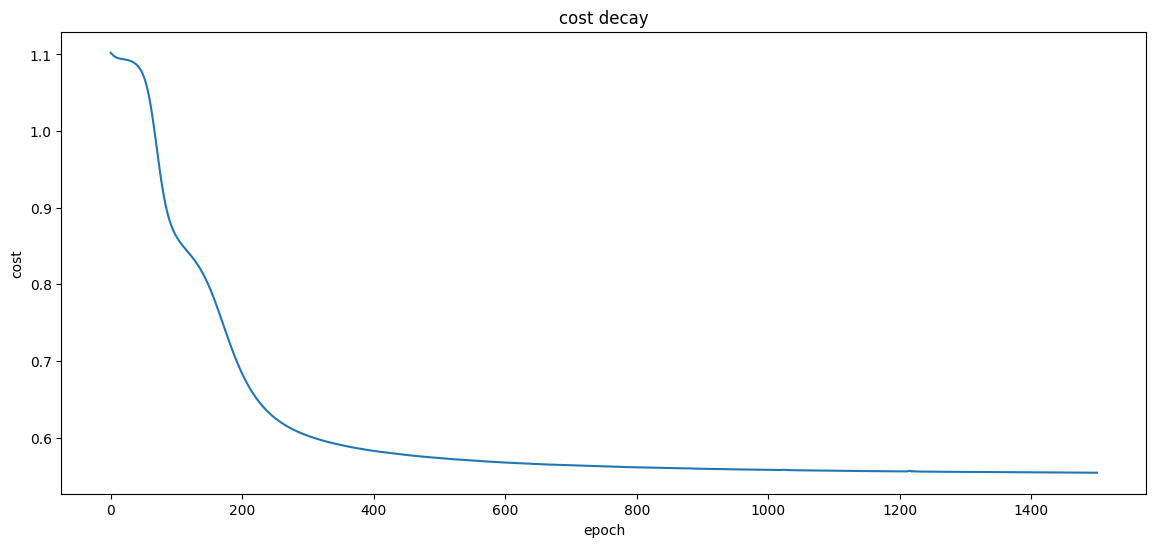

In [318]:
model = MLP_Model()

epochs = 1500

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss( )   

training(  epochs, model , loss_fn, opt  )


# Avaliação do Modelo

In [319]:
with torch.no_grad():
    model.eval()
    
    for xb, yb in test_dl:
        
        
        y_pred = model(xb.float())



    
    yf = torch.argmax(y_pred, dim=1)
    
    print(classification_report(yb, yf))        
        
            
            
    
# Dropoup --> apagar saida de um neuronio
# argmax --> pega o ag

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Fazendo Histograma dos valores de cada layer

In [320]:
MLP_Model().L1.weight

Parameter containing:
tensor([[-0.4629, -0.4844,  0.0107,  0.4106],
        [-0.3931, -0.0650, -0.4952,  0.4607],
        [-0.4464, -0.0764,  0.4007, -0.4595],
        [-0.4379, -0.0298, -0.2885, -0.1634],
        [-0.0776,  0.4526, -0.4367,  0.2648],
        [-0.4461,  0.3641, -0.0359, -0.2002],
        [-0.0826, -0.2058, -0.1366,  0.1309],
        [ 0.2308,  0.0036, -0.4288, -0.2223],
        [-0.0783, -0.0190,  0.1905, -0.2034],
        [ 0.0314, -0.2887,  0.3254,  0.0589],
        [ 0.2823,  0.3317,  0.3682, -0.2861],
        [ 0.0363,  0.1370, -0.0545,  0.4549],
        [ 0.1724,  0.2779,  0.0981, -0.4332],
        [ 0.4249, -0.3867,  0.2586,  0.2840],
        [-0.3158,  0.0732,  0.4905, -0.4605],
        [-0.2848,  0.1434,  0.0163,  0.1862],
        [ 0.3049,  0.4154,  0.4530,  0.2284],
        [-0.1626, -0.1592,  0.3604, -0.4152],
        [ 0.4981,  0.1057,  0.1696, -0.3460],
        [ 0.2601,  0.1844,  0.0468, -0.2694],
        [ 0.2053,  0.0944, -0.4202, -0.0477],
        [ 0.

In [321]:
MLP_Model().L1.weight.shape

torch.Size([32, 4])

In [322]:
MLP_Model().L1.weight[0][0]

tensor(0.1840, grad_fn=<SelectBackward0>)

In [323]:

# Vou ver somente de um neuronio, o 1o da layer 1

def training_alt( N_Epochs, model, loss_fn, opt  ):
    
    output_list = []
    
    for epoch in range(N_Epochs+1):
        for xb, yb in train_dl:
            
            
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
            
            output = MLP_Model().L1.weight[0][0]
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        
            print(epoch, "loss=", loss.item())
            output_list.append(output.item())
            
    
    plt.figure(figsize = (14,6))
    plt.title("Value")
    plt.plot(output_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
            



In [324]:
model = MLP_Model()

epochs = 1500

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss( )   

#training_alt(  epochs, model , loss_fn, opt  )

In [325]:
value_after_train = torch.histogram(MLP_Model().L1.weight.detach())

X_L1_after = value_after_train[1][0:100]
y_L1_after = value_after_train[0]


In [326]:
value_after_train = torch.histogram(MLP_Model().L2.weight.detach())

X_L2_after = value_after_train[1][0:100]
y_L2_after = value_after_train[0]


## Histograms
### Linear 1

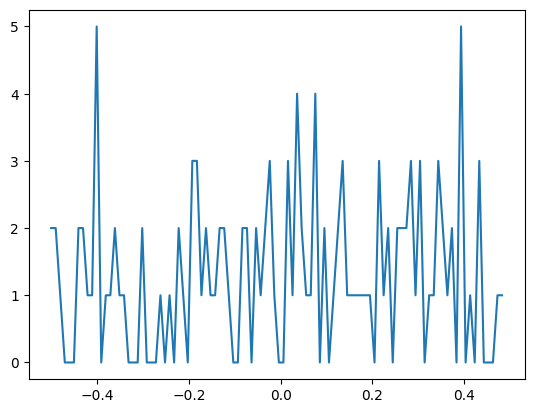

In [327]:
hist_before_train = plt.plot(X_L1_before,y_L1_before)

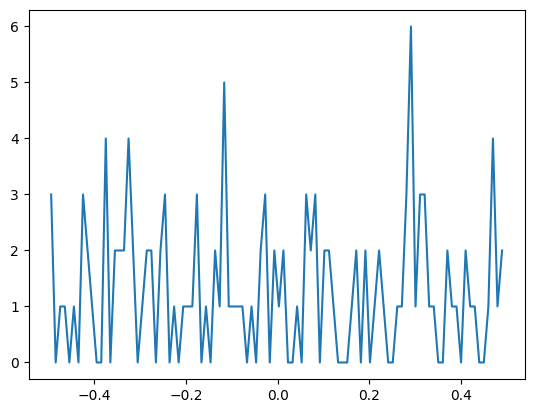

In [328]:
hist_after_train = plt.plot(X_L1_after,y_L1_after)

### Linear 2

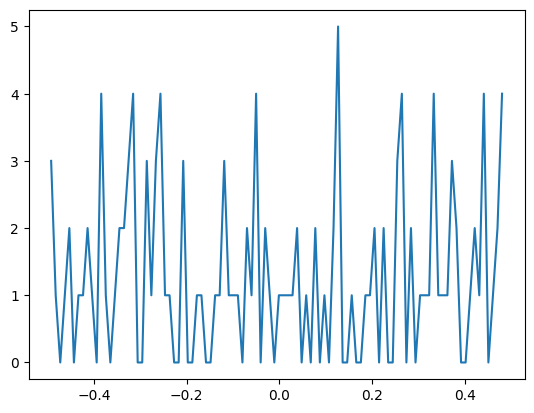

In [329]:
hist_before_train = plt.plot(X_L2_before,y_L2_before)

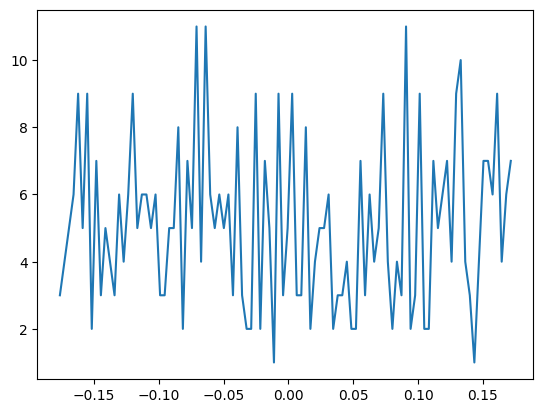

In [330]:
hist_after_train = plt.plot(X_L2_after,y_L2_after)